In [1]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader

device = "cuda" if torch.cuda.is_available() else "cpu"

## Q1
Implement two layer Feed Forward Neural Network for XOR Logic Gate with 2-bit Binary
Input using Sigmoid activation. Verify the number of learnable parameters in the model.

In [45]:
X = torch.tensor([[0,0], [0,1], [1,0], [1,1]], dtype=torch.float32)
Y = torch.tensor([0,1,1,0], dtype=torch.float32)

class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        # self.w = torch.nn.Parameter(torch.rand([1]))
        # self.b = torch.nn.Parameter(torch.rand([1]))

        self.lin1 = nn.Linear(2, 2, bias=True)
        self.act1 = nn.Sigmoid()
        self.lin2 = nn.Linear(2, 1, bias=True)
        # self.act2 = nn.Sigmoid()
    def forward(self, x):
        x = self.lin1(x)
        x = self.act1(x)
        x = self.lin2(x)
        # x = self.act2(x)
        return x

class XORDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        return self.X[index].to(device), self.Y[index].to(device)
    
xordata = XORDataset(X, Y)
train_dl = DataLoader(xordata, batch_size=1, shuffle=True)
model = XORModel().to(device)
print(model)

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.03)

epochs = 10000
loss_list = []
for epoch in range(epochs):
    avg_loss = 0.0
    model.train()

    for inputs, targets in train_dl:
        optimizer.zero_grad()
        outputs = model(inputs)
        outputs = outputs.view(-1)
        loss = loss_fn(outputs, targets)
        loss.backward()
        avg_loss += loss.item()
        optimizer.step()
    loss_list.append(avg_loss/4)

with torch.no_grad():
    for inputs, targets in train_dl:
        outputs = model(inputs)
        outputs = outputs.squeeze().round()
        print(f"Input: {inputs}, Target: {targets}, Predicted: {outputs}")

XORModel(
  (lin1): Linear(in_features=2, out_features=2, bias=True)
  (act1): Sigmoid()
  (lin2): Linear(in_features=2, out_features=1, bias=True)
)
Input: tensor([[0., 1.]], device='cuda:0'), Target: tensor([1.], device='cuda:0'), Predicted: 1.0
Input: tensor([[0., 0.]], device='cuda:0'), Target: tensor([0.], device='cuda:0'), Predicted: 0.0
Input: tensor([[1., 1.]], device='cuda:0'), Target: tensor([0.], device='cuda:0'), Predicted: 0.0
Input: tensor([[1., 0.]], device='cuda:0'), Target: tensor([1.], device='cuda:0'), Predicted: 1.0


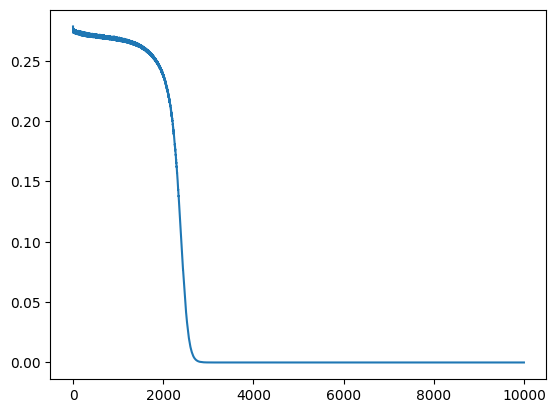

In [46]:
total_params = sum(p.numel() for p in model.parameters())
total_params

plt.plot(loss_list)

## Q2
Repeat Qn 1 by modifying the activation function to ReLU.

In [41]:
X = torch.tensor([[0,0], [0,1], [1,0], [1,1]], dtype=torch.float32)
Y = torch.tensor([0,1,1,0], dtype=torch.float32)

class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()

        self.lin1 = nn.Linear(2, 2, bias=True)
        self.act1 = nn.Sigmoid()
        self.lin2 = nn.Linear(2, 1, bias=True)
        self.act2 = nn.ReLU()
    def forward(self, x):
        x = self.lin1(x)
        x = self.act1(x)
        x = self.lin2(x)
        x = self.act2(x)
        return x

class XORDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        return self.X[index].to(device), self.Y[index].to(device)
    
xordata = XORDataset(X, Y)
train_dl = DataLoader(xordata, batch_size=1, shuffle=True)
model = XORModel().to(device)
print(model)

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.03)

epochs = 10000
loss_list = []

for epoch in range(epochs):
    avg_loss = 0.0
    model.train()

    for inputs, targets in train_dl:
        optimizer.zero_grad()
        outputs = model(inputs)
        outputs = outputs.view(-1)
        loss = loss_fn(outputs, targets)
        loss.backward()
        avg_loss += loss.item()
        optimizer.step()
    loss_list.append(avg_loss/4)

with torch.no_grad():
    for inputs, targets in train_dl:
        outputs = model(inputs)
        outputs = outputs.squeeze().round()
        print(f"Input: {inputs}, Target: {targets}, Predicted: {outputs}")

XORModel(
  (lin1): Linear(in_features=2, out_features=2, bias=True)
  (act1): Sigmoid()
  (lin2): Linear(in_features=2, out_features=1, bias=True)
  (act2): ReLU()
)
Input: tensor([[0., 0.]], device='cuda:0'), Target: tensor([0.], device='cuda:0'), Predicted: 0.0
Input: tensor([[1., 0.]], device='cuda:0'), Target: tensor([1.], device='cuda:0'), Predicted: 1.0
Input: tensor([[1., 1.]], device='cuda:0'), Target: tensor([0.], device='cuda:0'), Predicted: 0.0
Input: tensor([[0., 1.]], device='cuda:0'), Target: tensor([1.], device='cuda:0'), Predicted: 1.0


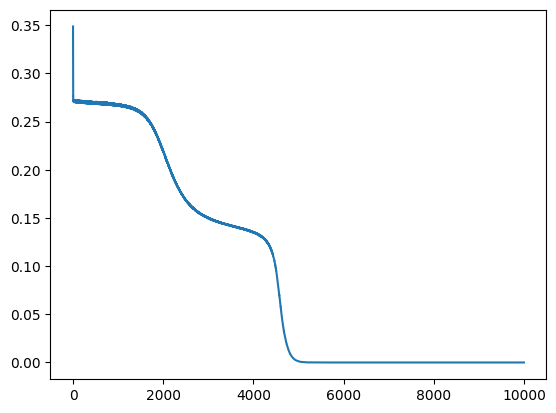

In [42]:
total_params = sum(p.numel() for p in model.parameters())
total_params

plt.plot(loss_list)

## Q3
Manually verify the output values by taking system generated values of weights and biases
for both Linear1 and Linear2 layers for Qn 1 and apply the transformations to input X and
implement the same.

In [16]:
w1 = model.lin1.weight.data
b1 = model.lin1.bias.data
w2 = model.lin2.weight.data
b2 = model.lin2.bias.data

In [28]:
for inputs, targets in train_dl:
    out1 = torch.matmul(inputs, w1.T) + b1
    out1 = torch.sigmoid(out1)
    out2 = torch.matmul(out1, w2.T) + b2
    out = out2.squeeze().round()
    print(f"Input: {inputs}, Target: {targets}, Predicted: {out}")

Input: tensor([[0., 0.]], device='cuda:0'), Target: tensor([0.], device='cuda:0'), Predicted: 0.0
Input: tensor([[1., 1.]], device='cuda:0'), Target: tensor([0.], device='cuda:0'), Predicted: 0.0
Input: tensor([[1., 0.]], device='cuda:0'), Target: tensor([1.], device='cuda:0'), Predicted: 1.0
Input: tensor([[0., 1.]], device='cuda:0'), Target: tensor([1.], device='cuda:0'), Predicted: 1.0


## Q4
Implement Feed Forward Neural Network with two hidden layers for classifying
handwritten digits using MNIST dataset. Display the classification accuracy in the form
of a Confusion matrix. Verify the number of learnable parameters in the model.

In [53]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import confusion_matrix

config = {
    'input_size': 784,
    'hidden_sizes': [256, 128],
    'num_classes': 10,
    'epochs': 10,
    'batch_size': 100,
    'lr': 0.001,
    'device': 'cuda' if torch.cuda.is_available() else 'cpu'
}

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_data = datasets.MNIST('data', train=True, download=True, transform=transform)
test_data = datasets.MNIST('data', train=False, transform=transform)

train_loader = DataLoader(train_data, batch_size=config['batch_size'], shuffle=True)
test_loader = DataLoader(test_data, batch_size=config['batch_size'])

class MNISTNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(config['input_size'], config['hidden_sizes'][0]),
            nn.ReLU(),
            nn.Linear(config['hidden_sizes'][0], config['hidden_sizes'][1]),
            nn.ReLU(),
            nn.Linear(config['hidden_sizes'][1], config['num_classes'])
        )
        
    def forward(self, x):
        return self.net(x)

model = MNISTNet().to(config['device'])
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=config['lr'])

for epoch in range(config['epochs']):
    for images, labels in train_loader:
        images, labels = images.to(config['device']), labels.to(config['device'])
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(config['device']), labels.to(config['device'])
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)
        
        all_preds.extend(preds.cpu())
        all_labels.extend(labels.cpu())

print(f"\nTest Accuracy: {100 * (torch.tensor(all_preds) == torch.tensor(all_labels)).float().mean():.2f}%")
print("\nConfusion Matrix:")
print(confusion_matrix(all_labels, all_preds))

params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nLearnable Parameters: {params:,}")


Test Accuracy: 97.71%

Confusion Matrix:
[[ 974    0    1    0    0    0    3    1    1    0]
 [   3 1114    3    1    0    2    8    2    2    0]
 [   5    1 1011    2    1    0    3    7    2    0]
 [   1    0    2  999    0    1    0    5    2    0]
 [   5    0    3    0  955    0    7    3    2    7]
 [   3    0    0   10    1  868    5    1    3    1]
 [   4    2    0    1    1    2  948    0    0    0]
 [   2    2    9    3    1    1    0 1004    2    4]
 [   8    0    2    9    0    2    9    4  939    1]
 [   3    2    0   13    8    5    2   11    6  959]]

Learnable Parameters: 235,146
